In [1]:
#!pip install yfinance
#!pip install yahoofinancials

import pandas as pd
import yfinance as yf


bnb = yf.download('BNB-USD',
                      start='2019-01-01',
                      end='2024-12-29',
                      progress=False,
)
bnb.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,,
2019-01-01,6.075273,6.075273,6.191929,5.885122,6.191432,23891162
2019-01-02,6.188613,6.188613,6.207873,5.949006,6.091465,30308610
2019-01-03,5.903535,5.903535,6.175116,5.901559,6.171907,22821639
2019-01-04,6.065138,6.065138,6.065898,5.863714,5.895052,29311136
2019-01-05,6.065543,6.065543,6.204376,6.034071,6.055661,30340637


In [2]:
bnb.tail()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD,BNB-USD
Date,,,,,,
2024-12-24,696.741150,696.741150,698.442444,681.998047,693.000732,1145844254
2024-12-25,702.326965,702.326965,711.986633,695.962708,696.741150,893387310
2024-12-26,688.360107,688.360107,718.162415,683.262451,702.326965,1253518341
2024-12-27,690.429382,690.429382,709.646423,685.199158,688.350891,1884726979
2024-12-28,720.959045,720.959045,729.315857,690.429382,690.429382,1890880986


In [3]:
#Close price data
closing_price = bnb[['Close']]

In [4]:
closing_price['Close']

Ticker,BNB-USD
Date,
2019-01-01,6.075273
2019-01-02,6.188613
2019-01-03,5.903535
2019-01-04,6.065138
2019-01-05,6.065543
...,...
2024-12-24,696.741150
2024-12-25,702.326965
2024-12-26,688.360107


In [5]:
import matplotlib.pyplot as plt

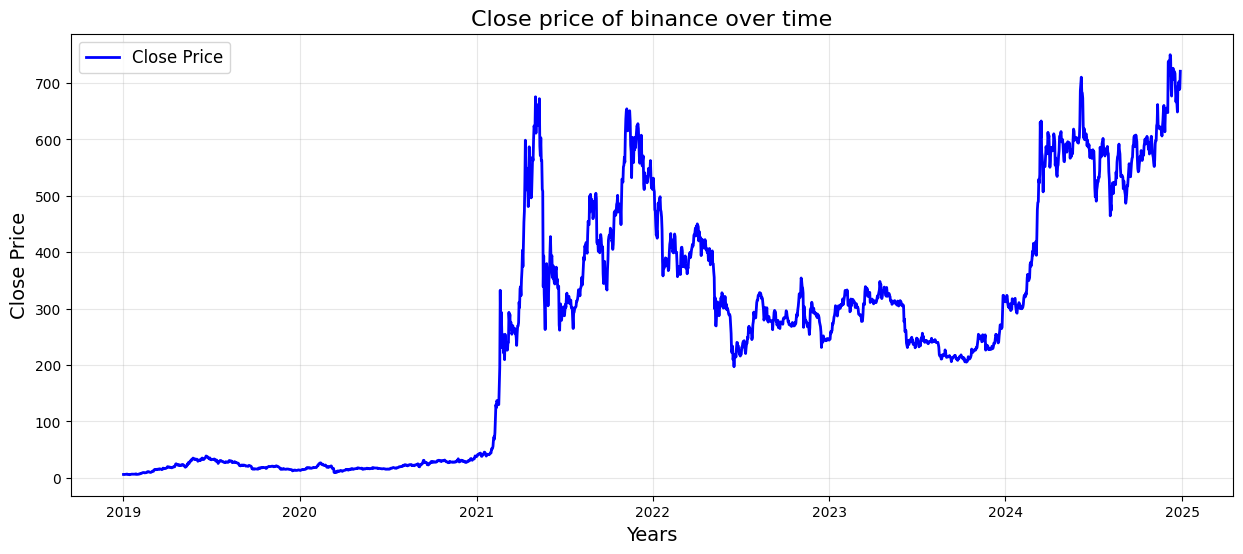

In [7]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.title("Close price of binance over time", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [8]:
# Moving Average
temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# moving average for 5 day -> null null null null 30.0 40.0
print(sum(temp_data[1:6])/5)

40.0


In [9]:
df1 = pd.DataFrame(temp_data)

In [10]:
df1.rolling(5).mean()

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,30.0
5,40.0
6,50.0
7,60.0
8,70.0
9,80.0


In [11]:
for i in range(2019, 2025):
    print(i, list(bnb.index.year).count(i))

2019 365
2020 366
2021 365
2022 365
2023 365
2024 363


In [12]:
closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()

<ipython-input-12-63837559cb05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window = 365).mean()
<ipython-input-12-63837559cb05>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window = 100).mean()


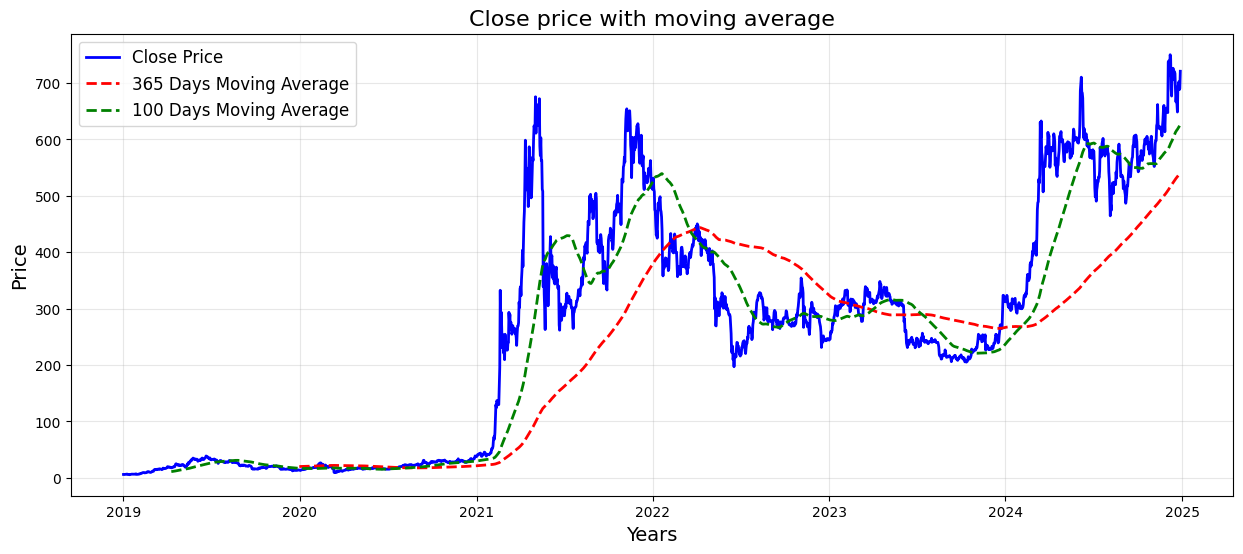

In [13]:
#Plot closing price with enchacement
plt.figure(figsize = (15, 6))
plt.plot(closing_price.index, closing_price['Close'], label = 'Close Price', color = 'blue', linewidth =2)
plt.plot(closing_price.index, closing_price['MA_365'], label = '365 Days Moving Average', color = 'red', linestyle ="--", linewidth =2)
plt.plot(closing_price.index, closing_price['MA_100'], label = '100 Days Moving Average', color = 'green',linestyle ="--", linewidth =2)

plt.title("Close price with moving average", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [15]:
len(scaled_data)

2189

In [16]:
import numpy as np

In [17]:
# Prepare data
x_data = []
y_data = []
base_days =100
for i in range(base_days, len(scaled_data)):
    x_data.append(scaled_data[i-base_days: i])
    y_data.append(scaled_data[i])
x_data = np.array(x_data)
x_data = x_data.reshape(2089, 100)
y_data = np.array(y_data)

In [18]:
x_data.shape

(2089, 100)

In [19]:
# Split into train and test sets
train_size = int(len(x_data) * 0.9)
x_train , y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [20]:
x_train.shape

(1880, 100)

In [21]:
x_train[0]

array([0.00068016, 0.00083235, 0.00044954, 0.00066655, 0.00066709,
       0.00111081, 0.00097039, 0.00143855, 0.00144056, 0.00046617,
       0.00068025, 0.00054815, 0.        , 0.00079297, 0.00047038,
       0.00082886, 0.00114015, 0.00133514, 0.00143237, 0.00124225,
       0.00132169, 0.00128164, 0.00130608, 0.00125827, 0.00156917,
       0.00193071, 0.00204033, 0.00085594, 0.00082303, 0.00081344,
       0.00093954, 0.00133457, 0.00177646, 0.0015703 , 0.00205685,
       0.00302275, 0.00338043, 0.00290259, 0.00403759, 0.00443478,
       0.00489159, 0.0053485 , 0.00506647, 0.0045284 , 0.00431486,
       0.00497523, 0.00478109, 0.00489764, 0.00545946, 0.00670645,
       0.00724758, 0.00661221, 0.00707443, 0.00700016, 0.00610221,
       0.00573819, 0.00530793, 0.00581489, 0.00644071, 0.00782118,
       0.00846106, 0.00801546, 0.00802626, 0.01106911, 0.01201711,
       0.01286032, 0.01181433, 0.01208148, 0.01198555, 0.01201237,
       0.01320978, 0.01281901, 0.01273304, 0.01276795, 0.01416

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# Initialize and train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [24]:
results = {}
for name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[name] = {'MSE': mse, 'R^2': r2}

# Print results
for model_name, metrics in results.items():
    print(f"{model_name} - MSE: {metrics['MSE']}, R^2: {metrics['R^2']}")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Linear Regression - MSE: 0.000599484571810783, R^2: 0.9099106296762073
Random Forest - MSE: 0.0029990079868621095, R^2: 0.54931493847066
Gradient Boosting - MSE: 0.0050614535112515095, R^2: 0.23937465417254877


In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
r2

0.5287342950212675

In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train)

predictions_ridge = ridge.predict(x_test)
mse_ridge = mean_squared_error(y_test, predictions_ridge)
r2_ridge = r2_score(y_test, predictions_ridge)

In [ ]:
r2_ridge

0.8888271524034543

In [25]:
predictions = models['Linear Regression'].predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

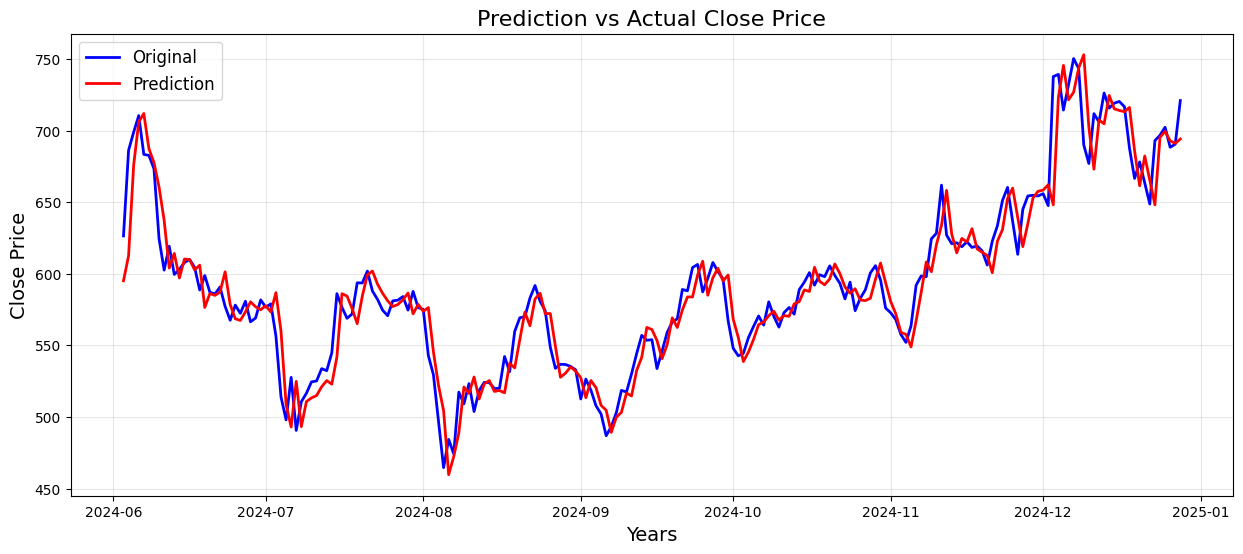

In [26]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize = (15, 6))
plt.plot(plotting_data.index, plotting_data['Original'], label = 'Original', color = 'blue', linewidth =2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label = 'Prediction', color = 'red',  linewidth =2)

plt.title("Prediction vs Actual Close Price", fontsize = 16)
plt.xlabel("Years", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [27]:
# Predict future days
last_100  = scaled_data[-100:].reshape(1, -1)
future_predictions=[]
for _ in range(10):
    next_days = models['Linear Regression'].predict(last_100)
    future_predictions.append(scaler.inverse_transform(next_days))
    last_100 = np.append(last_100[:, 1:], next_days.reshape(1, 1), axis = 1)

In [28]:
future_predictions

[array([[713.77065495]]),
 array([[716.37795613]]),
 array([[723.86635515]]),
 array([[721.95576423]]),
 array([[724.41727147]]),
 array([[728.44314065]]),
 array([[722.34646301]]),
 array([[721.40566895]]),
 array([[724.97303612]]),
 array([[729.07457547]])]

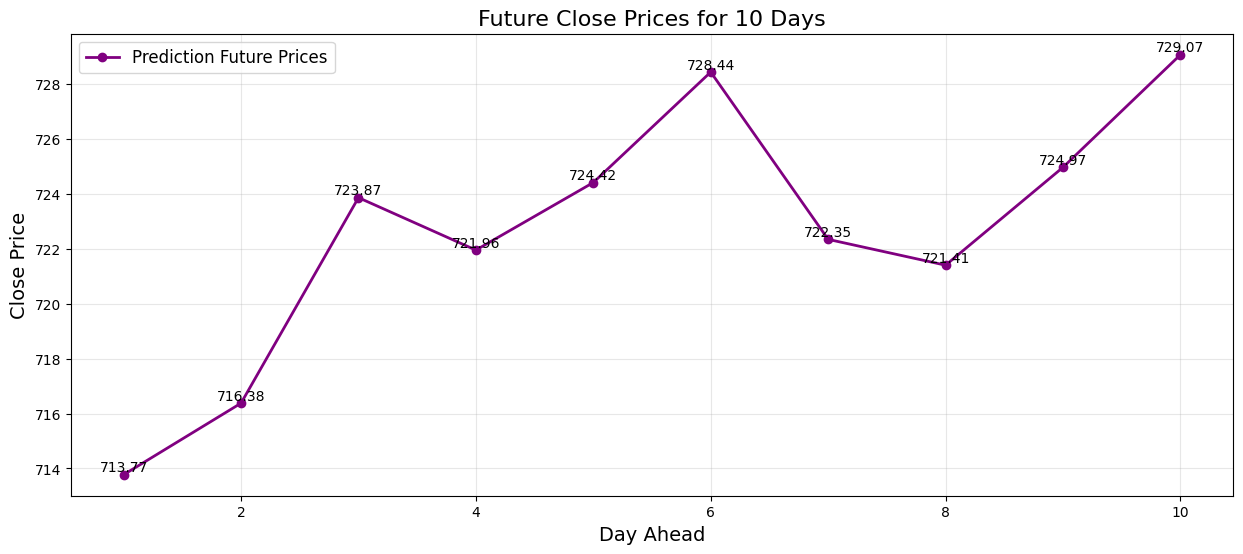

In [29]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize = (15, 6))
plt.plot(range(1, 11), future_predictions, marker="o" ,label = 'Prediction Future Prices', color = 'purple', linewidth =2)

for i, val in enumerate(future_predictions):
    plt.text(i+1,val,  f'{val:.2f}', fontsize = 10, ha = 'center', va = 'bottom', color='black')

plt.title("Future Close Prices for 10 Days", fontsize = 16)
plt.xlabel("Day Ahead", fontsize = 14)
plt.ylabel('Close Price', fontsize = 14)
plt.grid(alpha = 0.3)
plt.legend(fontsize = 12)
plt.show()

In [30]:
import joblib

# Save the model and scaler
joblib.dump(models['Linear Regression'], 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [31]:
from google.colab import files

# Download the saved files
files.download('linear_regression_model.pkl')
files.download('scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [32]:
# Save last_100 to a .npy file
np.save('last_100.npy', last_100)

# Download the saved file
files.download('last_100.npy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>